In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import operator
import tensorflow as tf
import random

In [2]:
DIRECTORY = r'../input/train-set/train'
VAL_DIRECTORY = r'../input/val-set'
   
CATEGORIES = ['all', 'hem']        

In [3]:
def crop_center(img, bounding):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, bounding))
    end = tuple(map(operator.add, start, bounding))
    slices = tuple(map(slice, start, end))
    return img[slices]

In [4]:
data = []
i = 0
#plt.figure(figsize=(15, 15))
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    #path = DIRECTORY
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path)
        #print(type(arr))
        crop_arr = crop_center(arr, (210,210))
        #if 1 <= i+1 <= 140:                      # total 140 image
        #    ax = plt.subplot(13, 11, i+1)
        #plt.imshow(crop_arr)
        i += 1
        data.append([crop_arr, label])

In [5]:
random.shuffle(data)

x_train = []
y_train = []

for features, label in data:
    x_train.append(features)
    y_train.append(label)

    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [6]:
val_data = []
i = 0
#plt.figure(figsize=(15, 15))
for category in CATEGORIES:
    path = os.path.join(VAL_DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path)
        crop_arr = crop_center(arr, (210,210))
        #if 1 <= i+1 <= 70:                     # total image 70
        #    ax = plt.subplot(10, 7, i+1)
        #plt.imshow(crop_arr)
        i += 1
        val_data.append([crop_arr, label])

In [7]:
random.shuffle(val_data)

x_val = []
y_val = []

for features, label in val_data:
    x_val.append(features)
    y_val.append(label)

    
x_val = np.array(x_val)
y_val = np.array(y_val)

In [8]:
'''
print(type(x_train))
print(x_train.dtype)
x_train = x_train.astype('float32')/255.0
x_val   = x_val.astype('float32')/255.0
print(type(x_train))
print(x_train.dtype)
print(type(x_val))
print(x_val.dtype)
'''#'''

"\nprint(type(x_train))\nprint(x_train.dtype)\nx_train = x_train.astype('float32')/255.0\nx_val   = x_val.astype('float32')/255.0\nprint(type(x_train))\nprint(x_train.dtype)\nprint(type(x_val))\nprint(x_val.dtype)\n"

In [9]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
import keras
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import tensorflow as tf
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, ReduceLROnPlateau





#'''
def build_vgg16_unet(input_shape):
    # detect and init the TPU
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()

    # instantiate a distribution strategy
    tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

    # instantiating the model in the strategy scope creates the model on the TPU
    with tpu_strategy.scope():
        #model = tf.keras.Sequential( … ) # define your model normally
        #model.compile( … )
    
    
        """ Input """
        inputs = Input(input_shape)
        s = Lambda(lambda x: x/255) (inputs)

        """ Pre-trained VGG16 Model """
        vgg16 = VGG16(include_top=True, weights=None, input_tensor=s, input_shape=None,
        pooling=None,
        classes=1,
        classifier_activation="sigmoid")
    
    return vgg16
#'''
     

if __name__ == "__main__":
    input_shape = (210, 210, 3)
    model = build_vgg16_unet(input_shape)
    model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 210, 210, 3)]     0         
_________________________________________________________________
lambda (Lambda)              (None, 210, 210, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 210, 210, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 210, 210, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 105, 105, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 105, 105, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 105, 105, 128)     147584

In [10]:
'''

#inputs = Input((210, 210, 3))

#s = Lambda(lambda x: x/255) (inputs)

model = tf.keras.applications.VGG16(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(210,210,3),
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
)
'''#'''

'\n\n#inputs = Input((210, 210, 3))\n\n#s = Lambda(lambda x: x/255) (inputs)\n\nmodel = tf.keras.applications.VGG16(\n    include_top=True,\n    weights=None,\n    input_tensor=None,\n    input_shape=(210,210,3),\n    pooling=None,\n    classes=1,\n    classifier_activation="sigmoid",\n)\n'

In [11]:
#model.summary()

In [12]:
from keras.optimizers import Adam, RMSprop
adam_opt = Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-5)
#sgd_opt = SGD(lr=1e-06, momentum=0.0, decay=0.0, nesterov=False)
#rmsp_opt = RMSprop(lr=1e-6, decay=0.9)
# eve_opt = Eve(lr=1e-4, decay=1E-4, beta_1=0.9, beta_2=0.999, beta_3=0.999, small_k=0.1, big_K=10, epsilon=1e-08)

model.compile(optimizer= adam_opt,
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [13]:
import keras
callbacks = [
    keras.callbacks.ModelCheckpoint('baseline_vgg.h5', monitor='val_accuracy', save_best_only=True, mode='max'),
    keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, verbose=1, patience=5, mode='max')]


In [14]:
import math
BATCH_SIZE=128

TRAINING_SIZE = x_train.shape[0]

VALIDATION_SIZE = x_val.shape[0]

compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / BATCH_SIZE))
train_steps_per_epoch = compute_steps_per_epoch(TRAINING_SIZE)
val_steps = compute_steps_per_epoch(VALIDATION_SIZE)
print(train_steps_per_epoch, val_steps)

84 15


In [15]:
from keras.utils import np_utils
print(x_train.shape, y_train.shape)
num_classes = 2
alt_y_train = np_utils.to_categorical(y_train,num_classes)
print(x_train.shape, alt_y_train.shape)

(10661, 210, 210, 3) (10661,)
(10661, 210, 210, 3) (10661, 2)


In [16]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(np.argmax(alt_y_train, axis=1)),np.argmax(alt_y_train, axis=1))
print("class weights: ",class_weights)

class weights:  [0.73301705 1.57288286]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0 1], y=[0 0 0 ... 0 0 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [17]:
history = model.fit(x_train, y_train, validation_data = (x_val,y_val), verbose = 1, batch_size=BATCH_SIZE, steps_per_epoch = train_steps_per_epoch, validation_steps = val_steps, epochs = 50, shuffle = True, class_weight = {0:0.73301705,1:1.57288286}, callbacks = callbacks)

Epoch 1/50
84/84 [==============================] - 52s 382ms/step - loss: 0.6511 - accuracy: 0.6565 - val_loss: 0.6442 - val_accuracy: 0.6668
Epoch 2/50
84/84 [==============================] - 8s 92ms/step - loss: 0.5095 - accuracy: 0.7810 - val_loss: 0.6336 - val_accuracy: 0.6802
Epoch 3/50
84/84 [==============================] - 8s 91ms/step - loss: 0.5035 - accuracy: 0.7820 - val_loss: 0.6325 - val_accuracy: 0.7033
Epoch 4/50
84/84 [==============================] - 8s 90ms/step - loss: 0.4846 - accuracy: 0.7927 - val_loss: 0.6217 - val_accuracy: 0.6845
Epoch 5/50
84/84 [==============================] - 8s 90ms/step - loss: 0.4949 - accuracy: 0.7859 - val_loss: 0.6397 - val_accuracy: 0.6743
Epoch 6/50
84/84 [==============================] - 8s 90ms/step - loss: 0.4712 - accuracy: 0.7978 - val_loss: 0.6100 - val_accuracy: 0.6958
Epoch 7/50
84/84 [==============================] - 8s 90ms/step - loss: 0.4825 - accuracy: 0.7956 - val_loss: 0.6389 - val_accuracy: 0.6706
Epoch 8/50


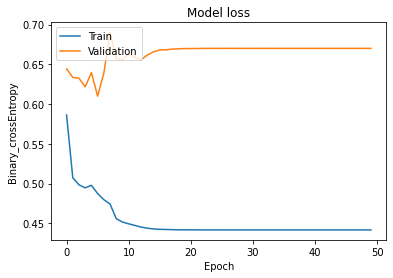

In [18]:
#'''                                                                                                                                                      
plt.plot(history.history['loss'])                                                                                                                                        
plt.plot(history.history['val_loss'])                                                                                                                                                                                                                                                     
plt.title('Model loss')                                                                                   
plt.ylabel('Binary_crossEntropy')                                                                                                                 
plt.xlabel('Epoch')                                                                      
plt.legend(['Train', 'Validation'], loc='upper left')          
plt.show()                                                                    
#'''                                                      

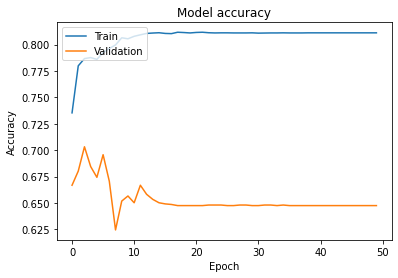

In [19]:
#'''                     
plt.plot(history.history['accuracy'])                                            
plt.plot(history.history['val_accuracy'])         
plt.title('Model accuracy')                           
plt.ylabel('Accuracy')                         
plt.xlabel('Epoch')                      
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
#'''

In [20]:
#'''
print('Lowest training loss: ', min(history.history['loss']))
print('Lowest validation loss: ', min(history.history['val_loss']))        
print('Highest training accuracy: ', max(history.history['accuracy']))
print('Highest validation accuracy: ', max(history.history['val_accuracy']))
#'''  

Lowest training loss:  0.44179049134254456
Lowest validation loss:  0.6099628210067749
Highest training accuracy:  0.8117436766624451
Highest validation accuracy:  0.7032672762870789


In [21]:
from IPython.display import FileLink
FileLink('./baseline_vgg.h5')    

/kaggle/working/baseline_vgg.h5

In [22]:
a

NameError: name 'a' is not defined

# With DataGenerator

In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import operator
import tensorflow as tf
import random
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
TRAIN_PATH = r'../input/train-set/train'
VAL_PATH = r'../input/val-set'

In [ ]:
def crop_center(img, bounding):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, bounding))
    end = tuple(map(operator.add, start, bounding))
    slices = tuple(map(slice, start, end))
    return img[slices]


'''
def random_crop(img, random_crop_size):
    # Note: image_data_format is 'channel_last'
    assert img.shape[2] == 3
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx), :]
'''

def crop_generator(batches, crop_length):
    """Take as input a Keras ImageGen (Iterator) and generate random
    crops from the image batches generated by the original iterator.
    """
    while True:
        batch_x, batch_y = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = crop_center(batch_x[i], (crop_length, crop_length))
        yield (batch_crops, batch_y)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_batches = train_datagen.flow_from_directory(TRAIN_PATH,
                                                  class_mode='binary', 
                                                  color_mode="rgb", 
                                                  batch_size=64, 
                                                  target_size=(210, 210),
                                                  shuffle=True,
                                                  seed=42
                                                  )

train_crops = crop_generator(train_batches, 210)

In [ ]:
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_batches = val_datagen.flow_from_directory(VAL_PATH,
                                                class_mode='binary', 
                                                color_mode="rgb", 
                                                batch_size=64, 
                                                target_size=(210, 210),
                                                shuffle=True,
                                                seed=42
                                                )

val_crops = crop_generator(val_batches, 210)

In [ ]:
model = tf.keras.applications.VGG16(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(210,210,3),
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
)
model.summary()

In [ ]:
from keras.optimizers import Adam, RMSprop
adam_opt = Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-5)
#sgd_opt = SGD(lr=1e-06, momentum=0.0, decay=0.0, nesterov=False)
rmsp_opt = RMSprop(lr=1e-4, decay=0.9)
# eve_opt = Eve(lr=1e-4, decay=1E-4, beta_1=0.9, beta_2=0.999, beta_3=0.999, small_k=0.1, big_K=10, epsilon=1e-08)

model.compile(optimizer= adam_opt,
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
import keras
callbacks = [
    keras.callbacks.ModelCheckpoint('baseline_vgg.h5', monitor='val_accuracy', save_best_only=True, mode='max'),
    keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, verbose=1, patience=5, mode='max')]


In [ ]:
model.fit(train_batches, 
                    #steps_per_epoch=train_batches.samples // BATCH_SIZE,
                    validation_data=val_batches, 
                    #validation_steps=val_batches.samples // BATCH_SIZE, 
                    epochs=50, 
                    verbose=1)

In [ ]:
model.fit_generator(train_batches,
                    validation_data = train_batches,
                    steps_per_epoch = train_batches.n//train_batches.batch_size,
                    validation_steps = val_batches.n//val_batches.batch_size,
                    epochs=5)                               